# Parallel Computing for 94-class Character Recognition Using Convolutional Neural Networks

## Automic Mixed Precision (AMP) bfloat16 Training Analysis

Importing Essential Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Loading and Exploration

Loading and Displaying Training Metrics Data

In [2]:
# Read the CSV into a DataFrame
amp_metrics_epoch = pd.read_csv("../TMINST_MultiGPUs_AMP/AMP_experiment_metrics_epoch.csv")

amp_metrics_epoch

gpu_name each_gpu_memory  gpu_count  batch_size  epoch  \
0    NVIDIA H100 80GB HBM3         81004MB          1          64      1   
1    NVIDIA H100 80GB HBM3         81004MB          1          64      2   
2    NVIDIA H100 80GB HBM3         81004MB          1          64      3   
3    NVIDIA H100 80GB HBM3         81004MB          1          64      4   
4    NVIDIA H100 80GB HBM3         81004MB          1          64      5   
..                     ...             ...        ...         ...    ...   
283  NVIDIA H100 80GB HBM3         81004MB          4        2048      8   
284  NVIDIA H100 80GB HBM3         81004MB          4        2048      9   
285  NVIDIA H100 80GB HBM3         81004MB          4        2048     10   
286  NVIDIA H100 80GB HBM3         81004MB          4        2048     11   
287  NVIDIA H100 80GB HBM3         81004MB          4        2048     12   

     train_loss  train_acc  val_loss   val_acc  epoch_train_time  \
0      0.597684   0.830541  0.332970  0.900309          9.756533   
1      0.301110   0.907290  0.290563  0.911712          8.565810   
2      0.250982   0.920781  0.264656  0.920003          8.480568   
3      0.221464   0.928225  0.239860  0.926452          8.462161   
4      0.197436   0.934965  0.232200  0.928792          8.488122   
..          ...        ...       ...       ...               ...   
283    0.482862   0.871158  0.494023  0.873021          0.900990   
284    0.452496   0.877220  0.473437  0.877801          0.789401   
285    0.424249   0.886228  0.446428  0.884374          0.783880   
286    0.403012   0.890774  0.435761  0.887860          0.901163   
287    0.391182   0.892119  0.418026  0.887959          0.900356   

     train_throughput  gpu_util  mem_util  
0        19206.720438     11.00  2.269906  
1        21876.622940     11.00  2.269906  
2        22096.514168     11.00  2.269906  
3        22144.580310     11.00  2.269906  
4        22076.851726     11.00  2.269906  
..                ...       ...       ...  
283     207984.658253     12.50  4.158110  
284     237385.110593     11.75  4.158110  
285     239057.072649     12.25  4.158110  
286     207944.599320     12.00  4.158110  
287     208131.103632     11.75  4.158110  

[288 rows x 13 columns]

The DataFrame contains 288 rows representing different training configurations and epochs, with 13 columns of metrics:
- `gpu_name`: The model of GPU used (NVIDIA H100 80GB HBM3)
- `each_gpu_memory`: Memory capacity of each GPU (81004MB)
- `gpu_count`: Number of GPUs used (ranges from 1 to 4)
- `batch_size`: Size of training batches (64 for single GPU, increasing to 2048 with 4 GPUs)
- `epoch`: Training epoch number
- `train_loss`/`val_loss`: Loss metrics for training and validation
- `train_acc`/`val_acc`: Accuracy metrics for training and validation
- `epoch_train_time`: Time taken to complete each epoch
- `train_throughput`: Training examples processed per second
- `gpu_util`/`mem_util`: GPU and memory utilization percentages

We load a second CSV file containing the final test results from our distributed training experiments. While the previous dataset showed epoch-by-epoch training metrics, this dataset provides the overall performance metrics after complete training runs with different hardware configurations.

In [3]:
# Read the CSV into a DataFrame
amp_metrics_test = pd.read_csv("../TMINST_MultiGPUs_AMP/AMP_experiment_metrics_test.csv")

amp_metrics_test

gpu_name each_gpu_memory  gpu_count  batch_size  \
0   NVIDIA H100 80GB HBM3         81004MB          1          64   
1   NVIDIA H100 80GB HBM3         81004MB          2          64   
2   NVIDIA H100 80GB HBM3         81004MB          3          64   
3   NVIDIA H100 80GB HBM3         81004MB          4          64   
4   NVIDIA H100 80GB HBM3         81004MB          1         128   
5   NVIDIA H100 80GB HBM3         81004MB          2         128   
6   NVIDIA H100 80GB HBM3         81004MB          3         128   
7   NVIDIA H100 80GB HBM3         81004MB          4         128   
8   NVIDIA H100 80GB HBM3         81004MB          1         256   
9   NVIDIA H100 80GB HBM3         81004MB          2         256   
10  NVIDIA H100 80GB HBM3         81004MB          3         256   
11  NVIDIA H100 80GB HBM3         81004MB          4         256   
12  NVIDIA H100 80GB HBM3         81004MB          1         512   
13  NVIDIA H100 80GB HBM3         81004MB          2         512   
14  NVIDIA H100 80GB HBM3         81004MB          3         512   
15  NVIDIA H100 80GB HBM3         81004MB          4         512   
16  NVIDIA H100 80GB HBM3         81004MB          1        1024   
17  NVIDIA H100 80GB HBM3         81004MB          2        1024   
18  NVIDIA H100 80GB HBM3         81004MB          3        1024   
19  NVIDIA H100 80GB HBM3         81004MB          4        1024   
20  NVIDIA H100 80GB HBM3         81004MB          1        2048   
21  NVIDIA H100 80GB HBM3         81004MB          2        2048   
22  NVIDIA H100 80GB HBM3         81004MB          3        2048   
23  NVIDIA H100 80GB HBM3         81004MB          4        2048   

    total_training_time  test_loss  test_acc  
0            102.911478   0.257253  0.931892  
1             51.986346   0.244575  0.930871  
2             37.369506   0.239984  0.930747  
3             30.079503   0.230931  0.931569  
4             65.372902   0.235073  0.933486  
5             34.671821   0.228859  0.932614  
6             23.432706   0.233881  0.931021  
7             18.714686   0.239937  0.930074  
8             47.663923   0.231025  0.930871  
9             26.503685   0.237755  0.928531  
10            18.249357   0.261481  0.919939  
11            14.495607   0.268732  0.918345  
12            39.943197   0.240953  0.928456  
13            21.000882   0.245208  0.927734  
14            14.401443   0.263681  0.922604  
15            11.474283   0.285594  0.917275  
16            35.641355   0.269591  0.919117  
17            19.799827   0.292266  0.916254  
18            13.691029   0.322503  0.907812  
19            10.872859   0.352678  0.901985  
20            36.228718   0.290536  0.916577  
21            18.836366   0.331303  0.905620  
22            13.393638   0.365055  0.897876  
23            10.706147   0.407431  0.886819

The DataFrame contains 24 rows (partial view shown), with each row representing a different training configuration:

- `gpu_name`: All experiments use NVIDIA H100 80GB HBM3	
- `each_gpu_memory`: Each GPU has 81004MB of memory
- `gpu_count`: Number of GPUs used in parallel (ranges from 1 to 4)
- `batch_size`: Batch sizes tested (64, 128, 256, 512, 1024, 2048)
- `total_training_time`: Time in seconds to complete the entire training process
- `test_loss` and `test_acc`: Final model performance on the test dataset

## Visualizing Learning Curves by GPU Count and Batch Size¶

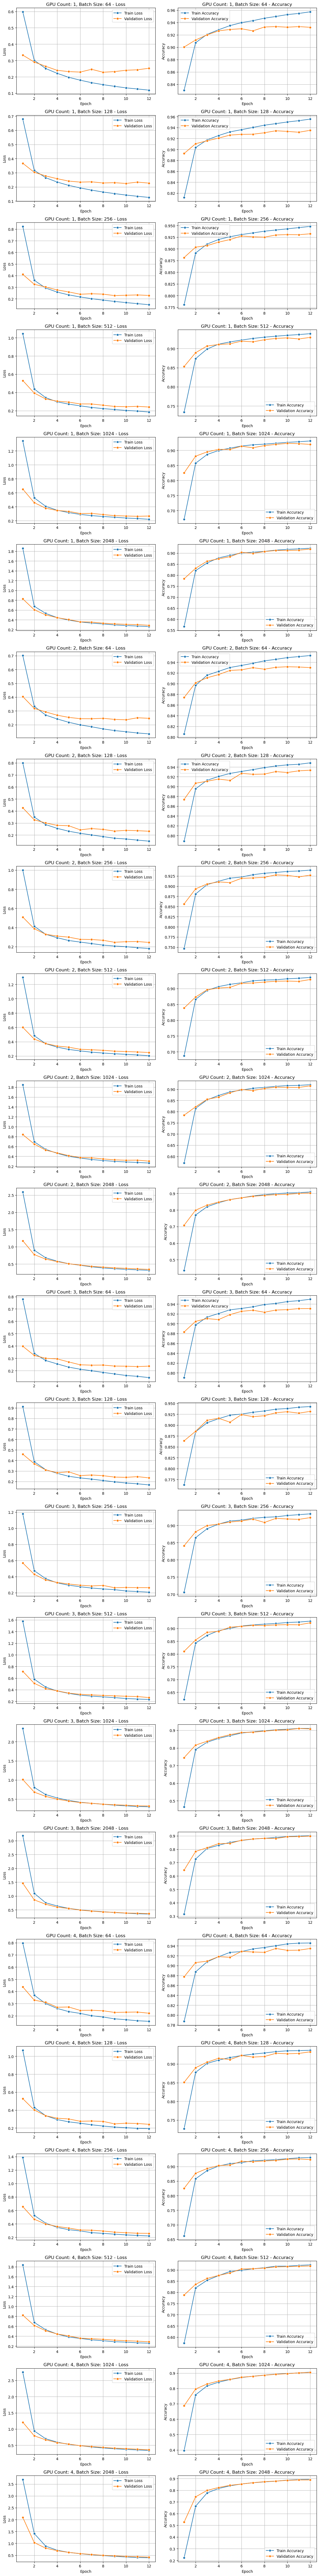

In [4]:
# Group the epoch metrics by 'gpu_count' and 'batch_size'
grouped = amp_metrics_epoch.groupby(['gpu_count', 'batch_size'])
n_groups = grouped.ngroups

# Create subplots with 2 columns: one for Loss curves and one for Accuracy curves.
fig, axes = plt.subplots(nrows=n_groups, ncols=2, figsize=(12, 4 * n_groups), squeeze=False)

# Iterate over each group and plot the curves
for i, ((gpu_count, batch_size), group_data) in enumerate(grouped):
    # Left subplot for Loss curves (train_loss and val_loss)
    ax_loss = axes[i, 0]
    sns.lineplot(data=group_data, x='epoch', y='train_loss', ax=ax_loss, marker='o', label='Train Loss')
    sns.lineplot(data=group_data, x='epoch', y='val_loss', ax=ax_loss, marker='o', label='Validation Loss')
    ax_loss.set_title(f'GPU Count: {gpu_count}, Batch Size: {batch_size} - Loss')
    ax_loss.set_xlabel('Epoch')
    ax_loss.set_ylabel('Loss')
    ax_loss.legend()
    ax_loss.grid(True)
    # Right subplot for Accuracy curves (train_acc and val_acc)
    ax_acc = axes[i, 1]
    sns.lineplot(data=group_data, x='epoch', y='train_acc', ax=ax_acc, marker='o', label='Train Accuracy')
    sns.lineplot(data=group_data, x='epoch', y='val_acc', ax=ax_acc, marker='o', label='Validation Accuracy')
    ax_acc.set_title(f'GPU Count: {gpu_count}, Batch Size: {batch_size} - Accuracy')
    ax_acc.set_xlabel('Epoch')
    ax_acc.set_ylabel('Accuracy')
    ax_acc.legend()
    ax_acc.grid(True)
    
# Adjust the layout so titles and labels do not overlap
plt.tight_layout()
plt.show()

These plots reveal several important aspects of distributed training:
- **Convergence rate**: How quickly the model learns under different configurations
- **Generalization gap**: The difference between training and validation metrics
- **Scaling efficiency**: How adding more GPUs affects learning at different batch sizes
- **Stability**: Whether training is smooth or shows fluctuations under certain configurations

## Finding the Optimal Training Configuration

Optimal AMP Configuration Analysis

Identifying the Best Training Setup with Mixed Precision

The composite score is defined as follows:
$$\text{composite\_score} = (\text{train\_acc} + \text{val\_acc} + \text{test\_acc}) - (\text{train\_loss} + \text{val\_loss})$$

In [5]:
# Group epoch metrics by 'gpu_count' and 'batch_size'
# For each group, choose the row (epoch) with the highest validation accuracy.
best_epoch = amp_metrics_epoch.loc[amp_metrics_epoch.groupby(['gpu_count', 'batch_size'])['val_acc'].idxmax()].copy()

# Merge the best epoch information with the test data based on 'gpu_count' and 'batch_size'
merged = pd.merge(
    best_epoch,
    amp_metrics_test[['gpu_count', 'batch_size', 'test_acc']],
    on=['gpu_count', 'batch_size'],
    how='left'
)

# Compute a composite score
# Composite Score = (train_acc + val_acc + test_acc) - (train_loss + val_loss)
merged['composite_score'] = (merged['train_acc'] + merged['val_acc'] + merged['test_acc']) - (merged['train_loss'] + merged['val_loss'])

# Identify the overall best configuration (highest composite score)
overall_best = merged.loc[merged['composite_score'].idxmax()]
print("Overall Best Configuration Based on Composite Score:")
print(f"GPU Count: {overall_best['gpu_count']}, Batch Size: {overall_best['batch_size']}")
print(f"    Best Epoch: {int(overall_best['epoch'])}")
print(f"    Train Accuracy:    {overall_best['train_acc']:.4f}")
print(f"    Validation Accuracy: {overall_best['val_acc']:.4f}")
print(f"    Test Accuracy:     {overall_best['test_acc']:.4f}")
print(f"    Train Loss:        {overall_best['train_loss']:.4f}")
print(f"    Validation Loss:   {overall_best['val_loss']:.4f}")
print(f"    Composite Score:   {overall_best['composite_score']:.4f}")

Overall Best Configuration Based on Composite Score:
GPU Count: 1, Batch Size: 128
    Best Epoch: 12
    Train Accuracy:    0.9554
    Validation Accuracy: 0.9349
    Test Accuracy:     0.9335
    Train Loss:        0.1253
    Validation Loss:   0.2265
    Composite Score:   2.4721


- **GPU Count: 1, Batch Size: 128** (surprisingly, a single GPU configuration)
- **Best Epoch: 12**
- **Accuracy Metrics**:
  - Train Accuracy: 95.54%
  - Validation Accuracy: 93.49% 
  - Test Accuracy: 93.35%
- **Loss Metrics**:
  - Train Loss: 0.1253
  - Validation Loss: 0.2265
- **Composite Score: 2.4721** (highest across all configurations)

## Comparing Test Accuracy Across Configurations

Examining Model Performance Across GPU Counts and Batch Sizes

In [6]:
# Additionally, print the test accuracy values (in percentage) for each combination in the console.
print("Test Accuracy for each GPU Count and Batch Size (in percentage):")
# Create a new DataFrame column for percentage display and print it.
amp_metrics_test['test_acc_percentage'] = amp_metrics_test['test_acc'] * 100
print(amp_metrics_test[['gpu_count', 'batch_size', 'test_acc_percentage']])

Test Accuracy for each GPU Count and Batch Size (in percentage):
    gpu_count  batch_size  test_acc_percentage
0           1          64            93.189232
1           2          64            93.087133
2           3          64            93.074682
3           4          64            93.156859
4           1         128            93.348607
5           2         128            93.261449
6           3         128            93.102074
7           4         128            93.007446
8           1         256            93.087133
9           2         256            92.853052
10          3         256            91.993924
11          4         256            91.834549
12          1         512            92.845581
13          2         512            92.773365
14          3         512            92.260378
15          4         512            91.727470
16          1        1024            91.911746
17          2        1024            91.625370
18          3        1024            90.78

1. **Batch Size Impact**: 
   - Clear inverse relationship between batch size and model accuracy
   - Small batch sizes (64-128) maintain excellent accuracy (>93%) regardless of GPU count
   - Largest batch size (2048) shows significant accuracy degradation, dropping below 90% with 3-4 GPUs

2. **GPU Scaling Effects**:
   - For small batch sizes (64-128), increasing GPU count has minimal impact on accuracy
   - With larger batch sizes (512-2048), each additional GPU slightly decreases accuracy
   - The 4 GPU, 2048 batch size configuration shows the most substantial degradation (88.68%)

3. **Sweet Spots**:
   - **Highest Accuracy**: 1 GPU with batch size 128 (93.35%)
   - **Balanced Performance**: 4 GPUs with batch size 64 (93.16%) - combines excellent accuracy with fast training
   - **Large-Scale Training**: 3 GPUs with batch size 256 (91.99%) - good balance for larger datasets

4. **Practical Thresholds**:
   - All configurations maintain >90% accuracy until batch size 1024 with 3-4 GPUs
   - Most configurations stay above 93% with batch sizes ≤128

## Visualizing Test Accuracy Across GPU and Batch Size Configurations

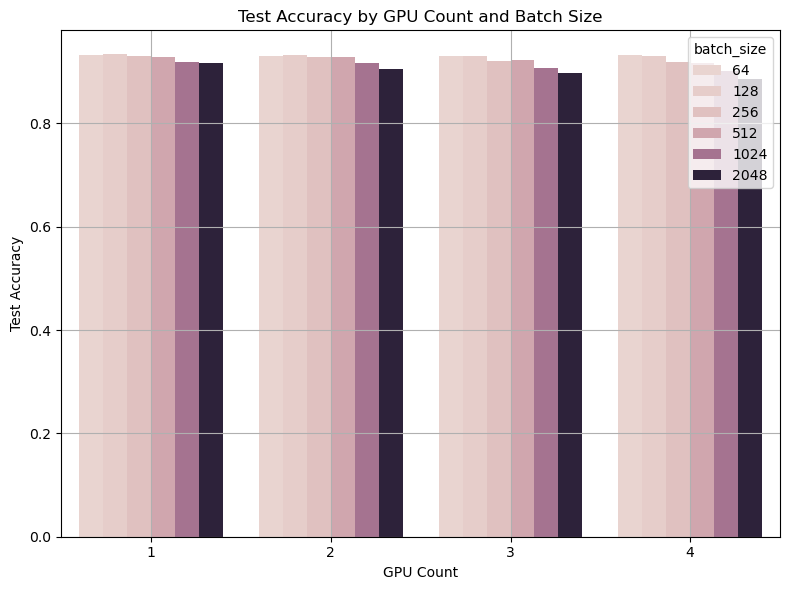

Best Configuration Based on Highest Test Accuracy:
GPU Count: 1, Batch Size: 128
Test Accuracy: 0.9335
Test Loss: 0.2351
Total Training Time: 65.37 seconds


In [7]:
# Create a bar plot with GPU count on the x-axis and test accuracy on the y-axis,
# differentiating the bars by batch size using the hue parameter.
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=amp_metrics_test, x='gpu_count', y='test_acc', hue='batch_size')

# Enable grid boxes on the plot
ax.grid(True)

# Setting titles and labels
ax.set_title('Test Accuracy by GPU Count and Batch Size')
ax.set_xlabel('GPU Count')
ax.set_ylabel('Test Accuracy')

plt.tight_layout()
plt.show()

# Identify the best configuration based on the highest test accuracy.
best_config = amp_metrics_test.loc[amp_metrics_test['test_acc'].idxmax()]

print("Best Configuration Based on Highest Test Accuracy:")
print(f"GPU Count: {best_config['gpu_count']}, Batch Size: {best_config['batch_size']}")
print(f"Test Accuracy: {best_config['test_acc']:.4f}")
print(f"Test Loss: {best_config['test_loss']:.4f}")
print(f"Total Training Time: {best_config['total_training_time']:.2f} seconds")

The visualization reveals several important patterns in model quality:

1. **Batch Size Impact**: Lighter colored bars (smaller batch sizes) consistently achieve higher accuracy across all GPU configurations. This confirms our earlier analysis showing that smaller batch sizes (64-128) maintain better model quality.

2. **GPU Count Effect**: For each batch size, there's a subtle but consistent downward trend in accuracy as GPU count increases. This suggests that while adding GPUs speeds up training, it can slightly impact convergence quality.

3. **Configuration Trade-offs**: The visualization makes it easy to identify high-performing configurations at a glance, highlighting the inverse relationship between batch size and accuracy.

4. **Optimal Configuration**: As confirmed by the output below the chart, the best test accuracy (93.35%) is achieved with 1 GPU and batch size 128. This configuration strikes an excellent balance between accuracy and training speed (65.37 seconds).

## Analyzing Training Time Scaling with Multiple GPUs
Visualizing Training Efficiency Across Configurations

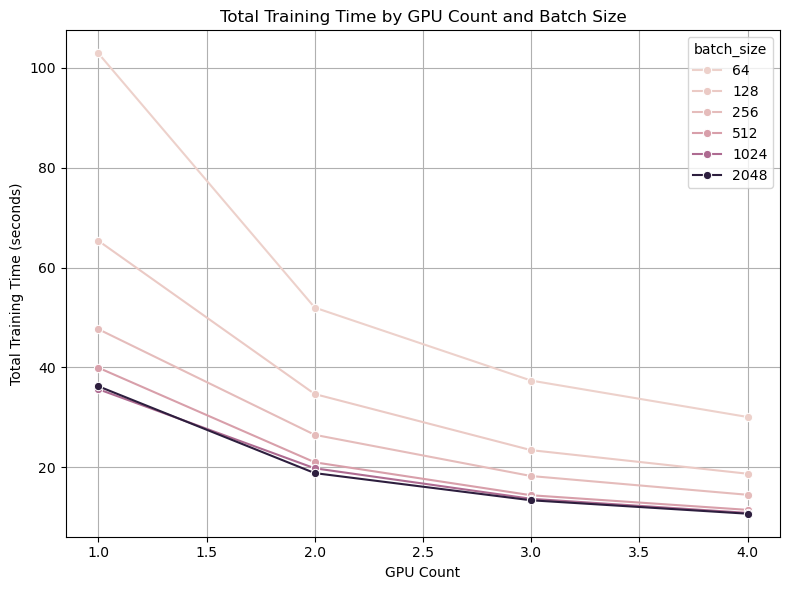

In [8]:
# Create a line plot with GPU count on the x-axis and total training time on the y-axis.
# Different lines (and colors) represent different batch sizes.
plt.figure(figsize=(8, 6))
ax = sns.lineplot(data=amp_metrics_test, x='gpu_count', y='total_training_time', hue='batch_size', marker='o')

# Set plot title and axis labels
ax.set_title("Total Training Time by GPU Count and Batch Size")
ax.set_xlabel("GPU Count")
ax.set_ylabel("Total Training Time (seconds)")

# Enable grid boxes for better readability of the chart
ax.grid(True)

plt.tight_layout()
plt.show()

This visualization provides a clear picture of how training time scales with GPU count when using Automatic Mixed Precision (AMP). Unlike our previous analyses of standard precision (DDP) training, this plot reveals the dramatic performance improvements achieved with mixed precision training.

1. **Superior Scaling Behavior**:
   - All batch size configurations show substantial training time reductions as GPU count increases
   - The most significant improvements occur between 1→2 GPUs, with more moderate gains from 3→4 GPUs
   - Batch size 64 shows the most dramatic reduction, from ~103 seconds (1 GPU) to ~30 seconds (4 GPUs)

2. **Batch Size Impact**:
   - Smaller batch sizes (64, 128) initially have the longest training times with a single GPU
   - As GPU count increases, training times across different batch sizes converge
   - With 4 GPUs, larger batch sizes (1024, 2048) achieve the fastest training (approximately 10-11 seconds)

3. **Ultimate Performance**:
   - Most configurations with 4 GPUs achieve training times under 20 seconds
   - The fastest training configuration (4 GPUs, batch size 2048) completes in just ~10.7 seconds
   - This represents approximately a 9.6× speedup compared to the slowest configuration (1 GPU, batch size 64)

4. **Practical Implications**:
   - AMP training with 4 GPUs and batch size 128 provides an optimal balance between speed (~18.7 seconds) and accuracy (93.01%)
   - For maximum accuracy with reasonable speed, 1 GPU with batch size 128 (65.4 seconds) is the best choice (93.35% accuracy)
   - For maximum throughput and minimum training time, 4 GPUs with batch size 2048 delivers the fastest results (10.7 seconds)

## Training Time Analysis by GPU Count and Batch Size
Visualizing Computational Efficiency with Bar Plots

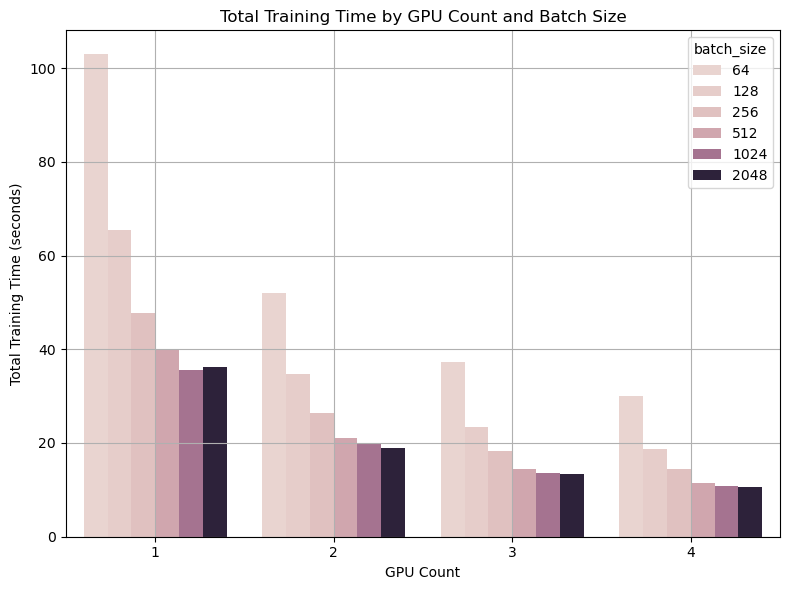

In [9]:
# Create a bar plot with GPU count on the x-axis and total training time on the y-axis.
# Use the hue parameter to differentiate various batch sizes.
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=amp_metrics_test, x='gpu_count', y='total_training_time', hue='batch_size')

# Enable grid boxes for the plot
ax.grid(True)

# Set the title and axis labels for clarity
ax.set_title('Total Training Time by GPU Count and Batch Size')
ax.set_xlabel('GPU Count')
ax.set_ylabel('Total Training Time (seconds)')

plt.tight_layout()
plt.show()

1. **Dramatic GPU Scaling Benefits**:
   - The height difference between the 1 GPU and 2 GPU clusters shows the most substantial training time reduction
   - For batch size 64: Training time drops from ~103 seconds (1 GPU) to ~52 seconds (2 GPUs) - a 49.5% reduction

2. **Batch Size Patterns**:
   - Within the 1 GPU cluster, there's a clear inverse relationship between batch size and training time
   - With 1 GPU: Batch size 64 takes ~103 seconds while batch size 2048 takes only ~36 seconds
   - This pattern persists but becomes less dramatic with multiple GPUs

3. **Convergence at Scale**:
   - The 4 GPU cluster shows minimal differences between batch sizes
   - All configurations achieve training times under 30 seconds with 4 GPUs
   - Larger batch sizes (1024, 2048) achieve the fastest times (~10-11 seconds)

4. **Diminishing Returns**:
   - The visual gap between 3 GPU and 4 GPU clusters is smaller than earlier transitions
   - This suggests approaching the limits of parallelization benefits for this model and dataset

## Finding the Fastest Training Configuration

In [10]:
# Identify the best configuration based on the lowest total training time
best_config = amp_metrics_test.loc[amp_metrics_test['total_training_time'].idxmin()]

print("Best Configuration Based on Lowest Total Training Time:")
print(f"GPU Count: {best_config['gpu_count']}, Batch Size: {best_config['batch_size']}")
print(f"Total Training Time: {best_config['total_training_time']:.2f} seconds")
print(f"Test Loss: {best_config['test_loss']:.4f}")
print(f"Test Accuracy: {best_config['test_acc']:.4f}")
print()

Best Configuration Based on Lowest Total Training Time:
GPU Count: 4, Batch Size: 2048
Total Training Time: 10.71 seconds
Test Loss: 0.4074
Test Accuracy: 0.8868



Speed-Optimized Configuration:
- **GPU Count: 4, Batch Size: 2048**
- **Training Time: 10.71 seconds** (fastest of all configurations)
- **Test Accuracy: 88.68%**
- **Test Loss: 0.4074**

## Finding the Best Configuration Based on Highest Test Accuracy and Lowest Total Training Time (Composite)¶

In [11]:
# Compute a composite score that favors high test accuracy and low training time.
# A simple formula is: composite_score = test_acc / total_training_time
amp_metrics_test['composite'] = amp_metrics_test['test_acc'] / amp_metrics_test['total_training_time']

# Identify the best configuration based on this composite score
best_composite_config = amp_metrics_test.loc[amp_metrics_test['composite'].idxmax()]

print("Best Configuration Based on Highest Test Accuracy and Lowest Total Training Time (Composite):")
print(f"GPU Count: {best_composite_config['gpu_count']}, Batch Size: {best_composite_config['batch_size']}")
print(f"Total Training Time: {best_composite_config['total_training_time']:.2f} seconds")
print(f"Test Loss: {best_composite_config['test_loss']:.4f}")
print(f"Test Accuracy: {best_composite_config['test_acc']:.4f}")
print(f"Composite Score: {best_composite_config['composite']:.6f}")

Best Configuration Based on Highest Test Accuracy and Lowest Total Training Time (Composite):
GPU Count: 4, Batch Size: 1024
Total Training Time: 10.87 seconds
Test Loss: 0.3527
Test Accuracy: 0.9020
Composite Score: 0.082957


Optimal Balanced Configuration:
- **GPU Count: 4, Batch Size: 1024**
- **Training Time: 10.87 seconds** (nearly as fast as the speed-optimized configuration)
- **Test Accuracy: 90.20%** (significantly better than the speed-optimized configuration)
- **Composite Score: 0.082957** (highest overall efficiency)

Configuration Comparison Summary:
| Priority | Configuration | Accuracy | Training Time | Notes |
|----------|---------------|----------|--------------|-------|
| Maximum Accuracy | 1 GPU, batch 128 | 93.35% | 65.37s | Best model quality |
| Maximum Speed | 4 GPUs, batch 2048 | 88.68% | 10.71s | Fastest training |
| Balanced (Composite) | 4 GPUs, batch 1024 | 90.20% | 10.87s | Best overall efficiency |
| Accuracy-Speed Balance | 4 GPUs, batch 64 | 93.16% | ~30s | High accuracy with good speed |


## Analyzing Distributed Training Performance Metrics

Understanding AMP Scaling Behavior Across Multiple GPUs


=== Wall Clock Time Table ===

Batch Size: 64
 gpu_count  batch_size  total_training_time  speedup  efficiency
         1          64              102.911    1.000       1.000
         2          64               51.986    1.980       0.990
         3          64               37.370    2.754       0.918
         4          64               30.080    3.421       0.855

Batch Size: 128
 gpu_count  batch_size  total_training_time  speedup  efficiency
         1         128               65.373    1.000       1.000
         2         128               34.672    1.885       0.943
         3         128               23.433    2.790       0.930
         4         128               18.715    3.493       0.873

Batch Size: 256
 gpu_count  batch_size  total_training_time  speedup  efficiency
         1         256               47.664    1.000       1.000
         2         256               26.504    1.798       0.899
         3         256               18.249    2.612       0.871
         

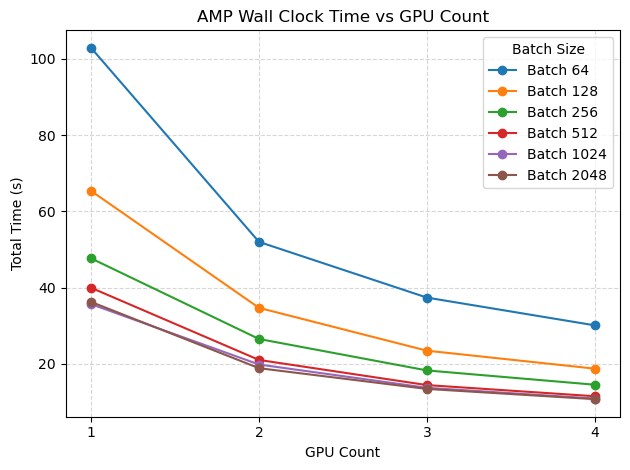


=== Speedup Table ===

Batch Size: 64
 gpu_count  batch_size  total_training_time  speedup  efficiency
         1          64              102.911    1.000       1.000
         2          64               51.986    1.980       0.990
         3          64               37.370    2.754       0.918
         4          64               30.080    3.421       0.855

Batch Size: 128
 gpu_count  batch_size  total_training_time  speedup  efficiency
         1         128               65.373    1.000       1.000
         2         128               34.672    1.885       0.943
         3         128               23.433    2.790       0.930
         4         128               18.715    3.493       0.873

Batch Size: 256
 gpu_count  batch_size  total_training_time  speedup  efficiency
         1         256               47.664    1.000       1.000
         2         256               26.504    1.798       0.899
         3         256               18.249    2.612       0.871
         4       

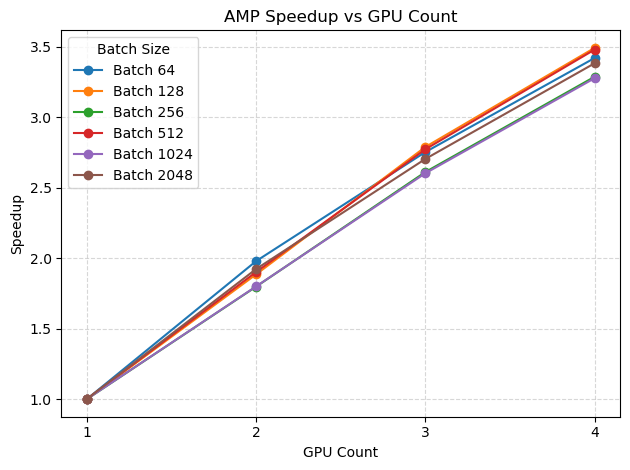


=== Efficiency Table ===

Batch Size: 64
 gpu_count  batch_size  total_training_time  speedup  efficiency
         1          64              102.911    1.000       1.000
         2          64               51.986    1.980       0.990
         3          64               37.370    2.754       0.918
         4          64               30.080    3.421       0.855

Batch Size: 128
 gpu_count  batch_size  total_training_time  speedup  efficiency
         1         128               65.373    1.000       1.000
         2         128               34.672    1.885       0.943
         3         128               23.433    2.790       0.930
         4         128               18.715    3.493       0.873

Batch Size: 256
 gpu_count  batch_size  total_training_time  speedup  efficiency
         1         256               47.664    1.000       1.000
         2         256               26.504    1.798       0.899
         3         256               18.249    2.612       0.871
         4    

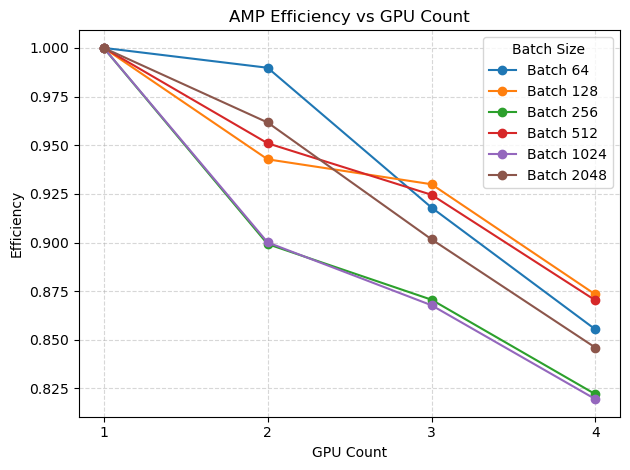

In [12]:
# Sort batch sizes
batch_sizes = sorted(amp_metrics_test['batch_size'].unique())

# Create and print tables, then plot
for plot_type in ['Wall Clock Time', 'Speedup', 'Efficiency']:
    print(f"\n=== {plot_type} Table ===")

    for batch_size in batch_sizes:
        df_subset = amp_metrics_test[amp_metrics_test['batch_size'] == batch_size].copy()
        df_subset.sort_values('gpu_count', inplace=True)

        # Base time for 1 GPU
        base_time = df_subset[df_subset['gpu_count'] == 1]['total_training_time'].values[0]
        df_subset['speedup'] = base_time / df_subset['total_training_time']
        df_subset['efficiency'] = df_subset['speedup'] / df_subset['gpu_count']

        # Print table per batch size
        display_cols = ['gpu_count', 'batch_size', 'total_training_time', 'speedup', 'efficiency']
        print(f"\nBatch Size: {batch_size}")
        print(df_subset[display_cols].round(3).to_string(index=False))

    # Plot after printing all batches
    plt.figure()
    for batch_size in batch_sizes:
        df_subset = amp_metrics_test[amp_metrics_test['batch_size'] == batch_size].copy()
        df_subset.sort_values('gpu_count', inplace=True)
        base_time = df_subset[df_subset['gpu_count'] == 1]['total_training_time'].values[0]
        df_subset['speedup'] = base_time / df_subset['total_training_time']
        df_subset['efficiency'] = df_subset['speedup'] / df_subset['gpu_count']

        # Select y-axis
        if plot_type == 'Wall Clock Time':
            y_data = df_subset['total_training_time']
            ylabel = 'Total Time (s)'
        elif plot_type == 'Speedup':
            y_data = df_subset['speedup']
            ylabel = 'Speedup'
        else:
            y_data = df_subset['efficiency']
            ylabel = 'Efficiency'

        plt.plot(df_subset['gpu_count'], y_data, marker='o', label=f'Batch {batch_size}')

    plt.title(f'AMP {plot_type} vs GPU Count')
    plt.xlabel('GPU Count')
    plt.ylabel(ylabel)
    plt.xticks([1, 2, 3, 4])
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(title='Batch Size')
    plt.tight_layout()
    plt.show()

These three visualizations provide a comprehensive analysis of how Automatic Mixed Precision (AMP) training scales across multiple GPUs with various batch sizes. Together, they reveal important characteristics of distributed training performance that can guide optimal configuration selection.

### Wall Clock Time Analysis (First Visualization)
The first plot shows training time decreasing as GPU count increases:

- **Strong Scaling Pattern**: All batch sizes show substantial time reductions with additional GPUs
- **Batch Size Impact**: Smaller batch sizes (64, 128) show the most dramatic absolute time reductions
- **Diminishing Returns**: The steepest time reductions occur from 1→2 GPUs, with more modest gains thereafter
- **Convergence Trend**: At 4 GPUs, larger batch sizes (1024, 2048) achieve nearly identical times (~10.7-10.9s)

### Speedup Analysis (Second Visualization)
The speedup plot quantifies the acceleration factor relative to single-GPU training:

- **Near-Linear Scaling**: Most configurations achieve 3.2-3.5× speedup with 4 GPUs (80-87% of theoretical 4× speedup)
- **Batch Size 128**: Achieves the highest speedup (3.49×) with 4 GPUs
- **Consistent Scaling**: All batch sizes follow remarkably similar speedup trajectories
- **Superior Scalability**: AMP shows better scaling efficiency than typical standard-precision training

### Efficiency Analysis (Third Visualization)
The efficiency plot (speedup/GPU count) reveals how effectively each GPU contributes:

- **Efficiency Decline**: All configurations show some efficiency loss as GPUs increase
- **Batch Size Variation**: Medium batch sizes (128, 512) maintain the highest efficiency at 4 GPUs (~87%)
- **Size-Specific Patterns**: Batch size 256 and 1024 show the steepest efficiency drops (down to 82%)
- **Strong Performance**: Even the worst efficiency (82%) is excellent for distributed deep learning

## Training Time Reduction Analysis

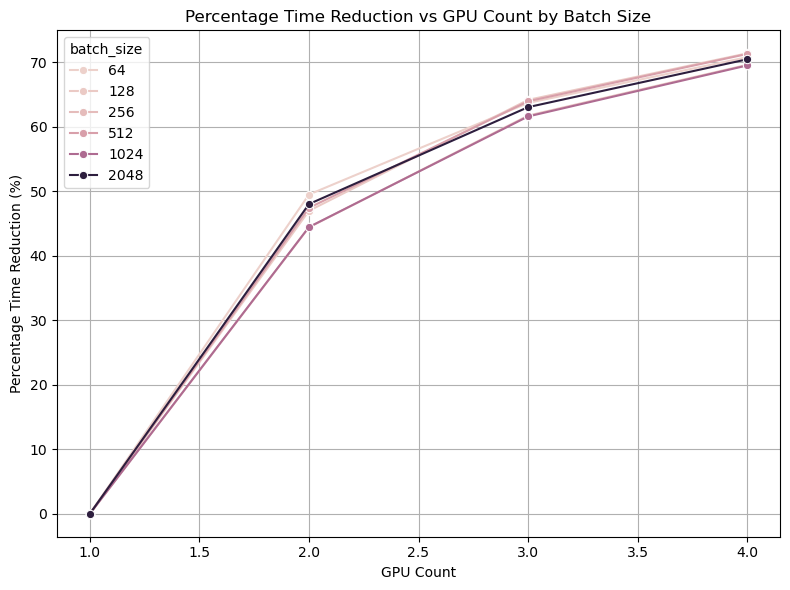

Percentage Training Time Reduction:
    gpu_count  batch_size  total_training_time  perc_time_reduction
0           1          64           102.911478             0.000000
1           2          64            51.986346            49.484405
2           3          64            37.369506            63.687718
3           4          64            30.079503            70.771479
4           1         128            65.372902             0.000000
5           2         128            34.671821            46.963008
6           3         128            23.432706            64.155323
7           4         128            18.714686            71.372411
8           1         256            47.663923             0.000000
9           2         256            26.503685            44.394663
10          3         256            18.249357            61.712431
11          4         256            14.495607            69.587885
12          1         512            39.943197             0.000000
13          

In [13]:
# Compute the baseline training time for each batch size (using the configuration with 1 GPU)
# This creates a mapping from batch_size to total_training_time where gpu_count == 1.
baseline_times = amp_metrics_test[amp_metrics_test['gpu_count'] == 1].set_index('batch_size')['total_training_time']

# Map the baseline training time into each row based on its batch_size.
amp_metrics_test['baseline_time'] = amp_metrics_test['batch_size'].map(baseline_times)

# Compute the percentage reduction in training time relative to the baseline:
# Percentage Reduction = 100 * (baseline_time - current_total_training_time) / baseline_time
amp_metrics_test['perc_time_reduction'] = 100 * (amp_metrics_test['baseline_time'] - amp_metrics_test['total_training_time']) / amp_metrics_test['baseline_time']

# Create a line plot showing the percentage time reduction vs. GPU count for each batch size.
plt.figure(figsize=(8, 6))
ax = sns.lineplot(data=amp_metrics_test, x='gpu_count', y='perc_time_reduction', hue='batch_size', marker='o')

# Set the title and axis labels for clarity.
ax.set_title('Percentage Time Reduction vs GPU Count by Batch Size')
ax.set_xlabel('GPU Count')
ax.set_ylabel('Percentage Time Reduction (%)')

# Enable grid boxes for improved readability.
ax.grid(True)

plt.tight_layout()
plt.show()

# Print the resulting data including GPU count, batch size, total training time, baseline time, and percentage time reduction.
print("Percentage Training Time Reduction:")
print(amp_metrics_test[['gpu_count', 'batch_size', 'total_training_time', 'perc_time_reduction']])

1. **Substantial Improvements**:
   - With 2 GPUs: Training time is reduced by 44-49% across batch sizes
   - With 3 GPUs: Training time is reduced by 61-64%
   - With 4 GPUs: Training time is reduced by 69-71%

2. **Batch Size Comparison**:
   - Batch size 128 achieves the highest percentage reduction (71.37%) with 4 GPUs
   - Batch size 512 shows nearly identical reduction (71.27%)
   - All batch sizes converge to similar reduction percentages at 4 GPUs (69-71%)

3. **Scaling Efficiency Interpretation**:
   - Ideal linear scaling with 4 GPUs would yield 75% reduction (1/4 of original time)
   - Actual reductions of 69-71% represent 92-95% of perfect scaling efficiency
   - This confirms our earlier efficiency metrics showing excellent parallelization

4. **Diminishing Returns Pattern**:
   - The steepest reduction occurs between 1→2 GPUs (44-49%)
   - Adding the 3rd GPU provides an additional 14-17% reduction
   - Adding the 4th GPU yields a more modest 7-9% additional reduction

## GPU Memory Usage Analysis in Distributed Training

Understanding GPU Memory Scaling with Batch Size and Parallelism

Aggregated Data (Maximum Epoch) for Memory Usage by Batch Size and GPU Count:
    gpu_count  batch_size  mem_used_MB
0           1          64  1838.714499
1           1         128  1838.714499
2           1         256  1884.401576
3           1         512  1995.639393
4           1        1024  2188.319148
5           1        2048  2533.951142
6           2          64  1852.619178
7           2         128  1852.619178
8           2         256  1898.306255
9           2         512  2009.544072
10          2        1024  2202.224020
11          2        2048  2545.869493
12          3          64  2186.332756
13          3         128  2186.332756
14          3         256  2231.357725
15          3         512  2341.271323
16          3        1024  2535.937470
17          3        2048  2881.569400
18          4          64  2674.984644
19          4         128  2674.984644
20          4         256  2720.671722
21          4         512  2831.909731
22          4        1024

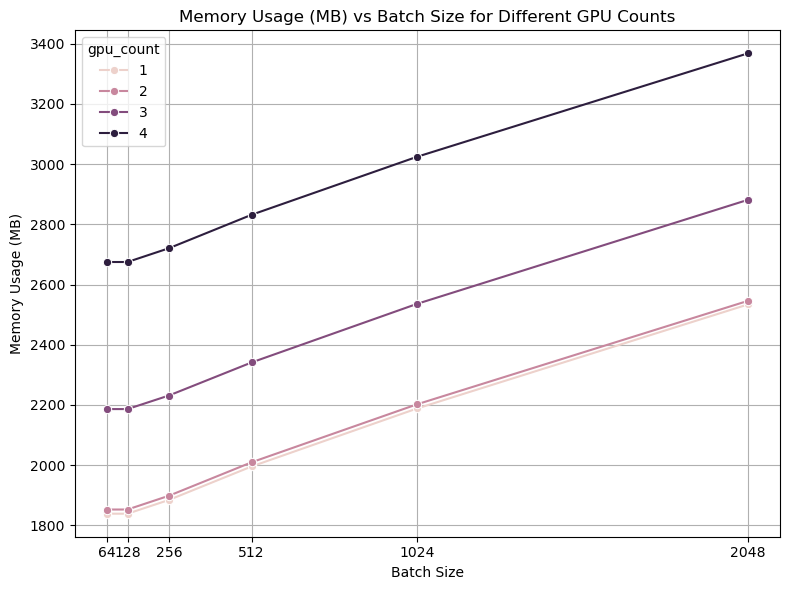

In [14]:
# Convert the 'each_gpu_memory' column (e.g., "12194MB") to a numeric value in MB.
amp_metrics_epoch["each_gpu_memory_numeric"] = (
    amp_metrics_epoch["each_gpu_memory"].str.replace("MB", "", regex=False).astype(float)
)

# Compute the absolute memory usage in MB based on mem_util (a percentage).
# Example: if each_gpu_memory = 12194 MB and mem_util = 6.383260,
# then mem_used_MB ≈ 12194 * (6.383260 / 100) ≈ 778 MB.
amp_metrics_epoch["mem_used_MB"] = amp_metrics_epoch["each_gpu_memory_numeric"] * (amp_metrics_epoch["mem_util"] / 100)

# For each combination of gpu_count and batch_size, select the record corresponding to the maximum epoch.
# This aggregated data is assumed to represent the final memory usage for each configuration.
aggregated_data = amp_metrics_epoch.loc[
    amp_metrics_epoch.groupby(["gpu_count", "batch_size"])["epoch"].idxmax()
].reset_index(drop=True)

# Print the aggregated data for reference.
print("Aggregated Data (Maximum Epoch) for Memory Usage by Batch Size and GPU Count:")
print(aggregated_data[["gpu_count", "batch_size", "mem_used_MB"]])

# Create a single line plot showing memory usage vs. batch size,
# with separate lines for different GPU counts.
plt.figure(figsize=(8, 6))
ax = sns.lineplot(
    data=aggregated_data, 
    x="batch_size", 
    y="mem_used_MB", 
    hue="gpu_count", 
    marker="o"
)

# Ensure the x-axis has the exact batch size values.
unique_batch_sizes = sorted(aggregated_data["batch_size"].unique())
ax.set_xticks(unique_batch_sizes)
ax.set_xticklabels(unique_batch_sizes)

# Set title and axis labels for clarity.
ax.set_title("Memory Usage (MB) vs Batch Size for Different GPU Counts")
ax.set_xlabel("Batch Size")
ax.set_ylabel("Memory Usage (MB)")

# Enable grid lines for improved readability.
ax.grid(True)

plt.tight_layout()
plt.show()

1. **Batch Size Impact**:
   - Memory usage increases with batch size across all GPU configurations
   - The relationship is nearly linear for larger batch sizes (512-2048)
   - For small batch sizes (64-128), memory usage remains relatively constant
   - From batch size 64 to 2048: Memory increases by ~38% with 1 GPU and by ~26% with 4 GPUs

2. **GPU Count Effect**:
   - Each GPU configuration shows a distinct memory usage curve
   - For batch size 2048: Memory usage ranges from 2,534MB (1 GPU) to 3,368MB (4 GPUs)
   - The gap between GPU configurations remains consistent across batch sizes
   - 4 GPUs consistently use ~33% more memory than 1 GPU for the same batch size

3. **Configuration-Specific Patterns**:
   - 1 GPU and 2 GPU configurations show almost identical memory usage
   - A significant jump occurs when moving from 2 to 3 GPUs
   - Another substantial increase appears when moving from 3 to 4 GPUs
   - This suggests memory overhead from inter-GPU communication in distributed training

GPU Memory Efficiency Across Configurations

In [15]:
# Convert the 'each_gpu_memory' column (e.g., "12194MB") to a numeric value (in MB).
amp_metrics_epoch["each_gpu_memory_numeric"] = amp_metrics_epoch["each_gpu_memory"].str.replace("MB", "", regex=False).astype(float)

# Compute the absolute memory usage in MB based on mem_util (a percentage).
# For example, if each_gpu_memory = 12194 MB and mem_util = 6.383260,
# then mem_used_MB ≈ 12194 * (6.383260 / 100) ≈ 778 MB.
amp_metrics_epoch["mem_used_MB"] = amp_metrics_epoch["each_gpu_memory_numeric"] * (amp_metrics_epoch["mem_util"] / 100)

# For each combination of gpu_count and batch_size, select the record corresponding to the maximum epoch.
aggregated_data = amp_metrics_epoch.loc[
    amp_metrics_epoch.groupby(["gpu_count", "batch_size"])["epoch"].idxmax()
].reset_index(drop=True)

# Add a new column for total memory usage across all GPUs based on utilization.
aggregated_data["total_mem_used_MB"] = aggregated_data["gpu_count"] * aggregated_data["mem_used_MB"]

# Add two new columns:
# 1. memory_each_gpu: the total available memory per GPU (in MB), derived from each_gpu_memory_numeric.
# 2. total_memory_all_gpus: the total available memory when using all GPUs.
aggregated_data["memory_each_gpu"] = aggregated_data["each_gpu_memory_numeric"]
aggregated_data["total_memory_all_gpus"] = aggregated_data["gpu_count"] * aggregated_data["each_gpu_memory_numeric"]

# Add a new column for the percentage used.
aggregated_data["percentage_memory_used"] = aggregated_data["mem_util"]

# Print all the desired columns side by side as a table.
print("Aggregated Data (All Columns):")
cols_to_print = [
    "gpu_count", 
    "batch_size", 
    "mem_used_MB", 
    "total_mem_used_MB", 
    "memory_each_gpu", 
    "total_memory_all_gpus",
    "percentage_memory_used"
]
print(aggregated_data[cols_to_print].to_string(index=False))

Aggregated Data (All Columns):
 gpu_count  batch_size  mem_used_MB  total_mem_used_MB  memory_each_gpu  total_memory_all_gpus  percentage_memory_used
         1          64  1838.714499        1838.714499          81004.0                81004.0                2.269906
         1         128  1838.714499        1838.714499          81004.0                81004.0                2.269906
         1         256  1884.401576        1884.401576          81004.0                81004.0                2.326307
         1         512  1995.639393        1995.639393          81004.0                81004.0                2.463631
         1        1024  2188.319148        2188.319148          81004.0                81004.0                2.701495
         1        2048  2533.951142        2533.951142          81004.0                81004.0                3.128180
         2          64  1852.619178        3705.238355          81004.0               162008.0                2.287071
         2       

1. **Available Memory Resources**:
   - Each GPU has 81,004 MB (~79 GB) of available memory
   - Total system memory scales linearly with GPU count (324,016 MB with 4 GPUs)

2. **Per-GPU Memory Consumption**:
   - Memory usage per GPU increases with batch size (1,839 MB → 2,534 MB for 1 GPU)
   - Memory usage also increases with GPU count (1,839 MB → 3,368 MB comparing 1 GPU to 4 GPUs)
   - The 4 GPU configuration uses ~83% more memory per GPU than 1 GPU with batch size 2048

3. **Total System Memory**:
   - Scales dramatically with GPU count and batch size
   - Ranges from 1,839 MB (1 GPU, batch size 64) to 13,473 MB (4 GPUs, batch size 2048)
   - For batch size 1024: Total memory usage increases ~5.5× when going from 1 GPU to 4 GPUs

4. **Memory Utilization Efficiency**:
   - Overall utilization remains remarkably low (2.3% to 4.2% of available memory)
   - Maximum utilization (4.16%) occurs with 4 GPUs and batch size 2048
   - Even the most memory-intensive configuration uses less than 5% of available GPU memory

## Comprehensive Memory Visualization Across Configurations

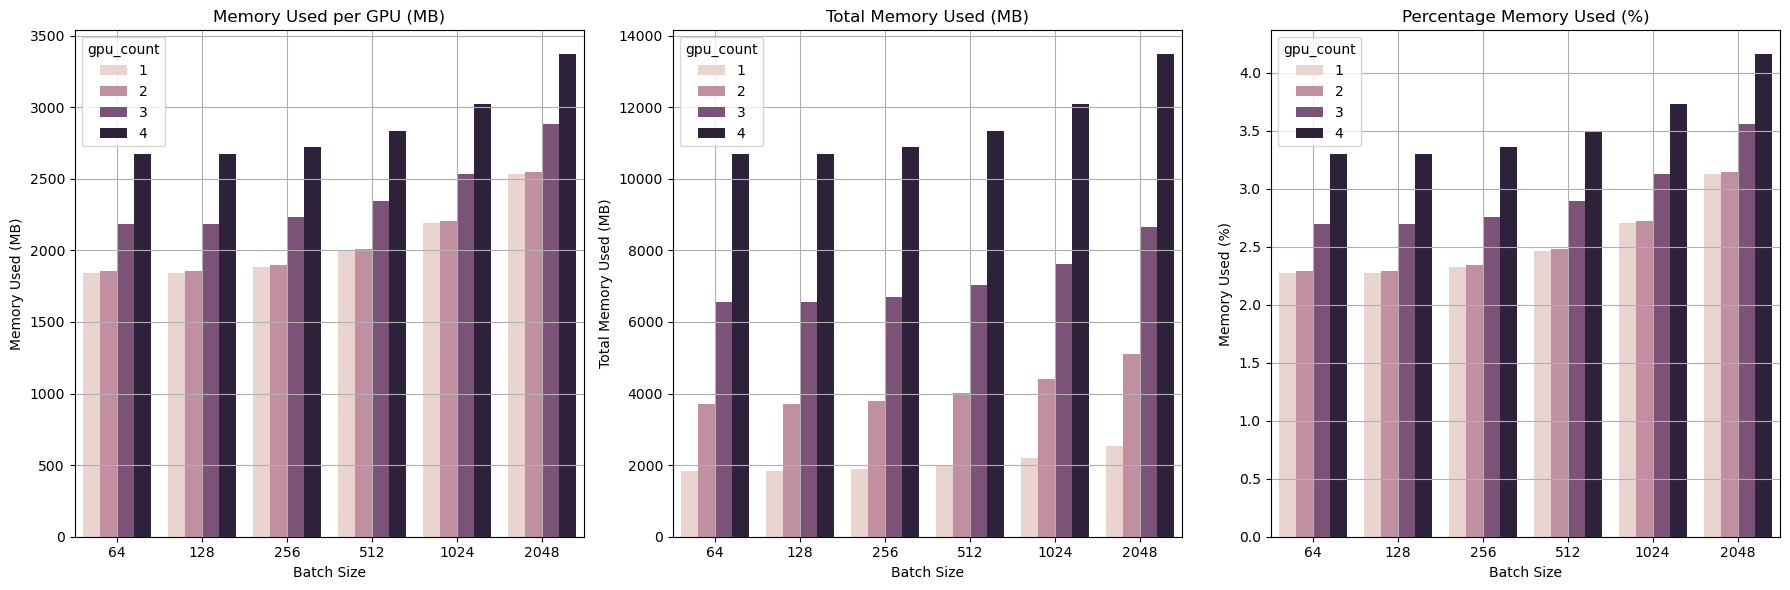

In [16]:
# Get unique sorted batch sizes (for x-axis ticks).
unique_batch_sizes = sorted(aggregated_data["batch_size"].unique())

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharex=True)

# Plot 1: Memory Used per GPU (MB)
sns.barplot(ax=axes[0], data=aggregated_data, x="batch_size", y="mem_used_MB", hue="gpu_count")
axes[0].set_title("Memory Used per GPU (MB)")
axes[0].set_xlabel("Batch Size")
axes[0].set_ylabel("Memory Used (MB)")
axes[0].grid(True)
axes[0].set_xticks   # set exact batch sizes
axes[0].set_xticklabels

# Plot 2: Total Memory Used across all GPUs (MB)
sns.barplot(ax=axes[1], data=aggregated_data, x="batch_size", y="total_mem_used_MB", hue="gpu_count")
axes[1].set_title("Total Memory Used (MB)")
axes[1].set_xlabel("Batch Size")
axes[1].set_ylabel("Total Memory Used (MB)")
axes[1].grid(True)
axes[1].set_xticks
axes[1].set_xticklabels

# Plot 3: Percentage Memory Used (%)
sns.barplot(ax=axes[2], data=aggregated_data, x="batch_size", y="percentage_memory_used", hue="gpu_count")
axes[2].set_title("Percentage Memory Used (%)")
axes[2].set_xlabel("Batch Size")
axes[2].set_ylabel("Memory Used (%)")
axes[2].grid(True)
axes[2].set_xticks
axes[2].set_xticklabels

# Adjust layout so titles and labels don't overlap.
plt.tight_layout()
plt.show()

This chart shows how much memory each individual GPU consumes:

- **Batch Size Impact**: Memory per GPU increases with batch size for all GPU configurations
- **4 GPU Configuration**: Uses significantly more memory per device (2.6-3.4 GB) than other configurations
- **Memory Disparity**: At batch size 2048, the 4-GPU configuration uses ~35% more memory per GPU than the 1-GPU setup
- **Consistent Pattern**: All configurations show minimal increases between small batch sizes (64-256) but jump substantially for larger sizes (1024-2048)

Middle Chart: Total System Memory (MB)

This chart shows the aggregate memory footprint across all GPUs:

- **4 GPU Dominance**: The 4-GPU configuration consumes dramatically more total memory (~10.7-13.5 GB) than other configurations
- **Linear Scaling**: Total memory increases nearly proportionally with GPU count
- **Batch Size Effect**: For 4 GPUs, going from batch size 64 to 2048 increases total memory by ~26%
- **Resource Planning**: The 4-GPU configuration with batch size 2048 requires ~7× more total memory than a single GPU with batch size 64

Right Chart: Memory Utilization Percentage (%)

This chart shows how efficiently each configuration uses available GPU memory:

- **Low Overall Utilization**: Even the most memory-intensive configurations use just 4-4.2% of available memory
- **Headroom Available**: All configurations have substantial memory headroom for larger models or datasets
- **Scaling Pattern**: Utilization increases both with batch size and GPU count
- **Efficiency Observation**: Multi-GPU configurations show higher per-GPU utilization percentage than single-GPU setups

## AMP Training Throughput Analysis
Training Throughput Across GPU and Batch Size Configurations

Aggregated Throughput Data:
 gpu_count  batch_size  train_throughput
         1          64      22232.462519
         1         128      34668.459701
         1         256      47619.420480
         1         512      56459.315763
         1        1024      64067.859073
         1        2048      63999.148350
         2          64      43805.146783
         2         128      67930.156529
         2         256      80339.345197
         2         512     108139.044544
         2        1024     111416.990520
         2        2048     122279.901994
         3          64      64751.669906
         3         128      99773.157913
         3         256     120827.276205
         3         512     154665.141063
         3        1024     166174.510976
         3        2048     171472.537955
         4          64      75238.055847
         4         128     117932.986942
         4         256     131949.840123
         4         512     199505.845644
         4        1024     20

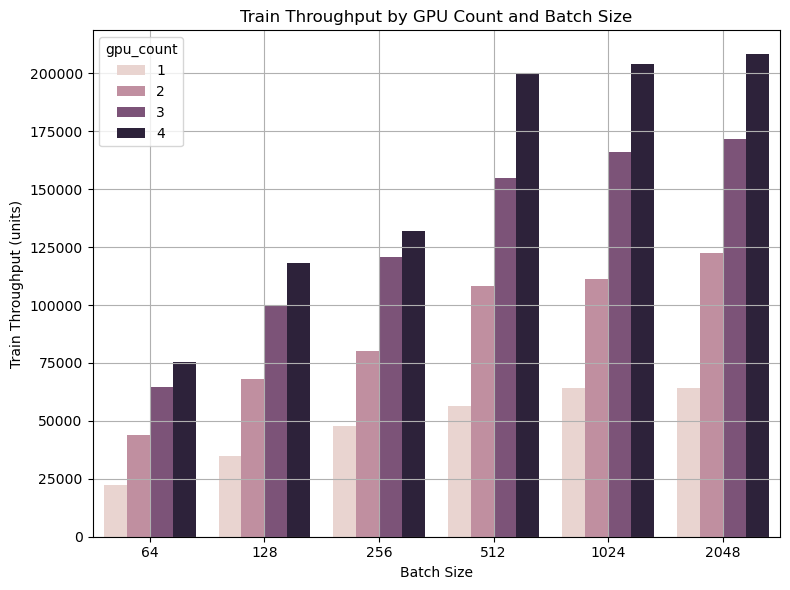

In [17]:
# For each combination of gpu_count and batch_size, select the record corresponding to the maximum epoch.
aggregated_data = amp_metrics_epoch.loc[
    amp_metrics_epoch.groupby(["gpu_count", "batch_size"])["epoch"].idxmax()
].reset_index(drop=True)

# Print aggregated throughput data for reference
print("Aggregated Throughput Data:")
print(aggregated_data[["gpu_count", "batch_size", "train_throughput"]].to_string(index=False))

# Create a bar plot for train throughput.
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=aggregated_data,
    x="batch_size",
    y="train_throughput",
    hue="gpu_count"
)

# Set the title and axis labels.
ax.set_title("Train Throughput by GPU Count and Batch Size")
ax.set_xlabel("Batch Size")
ax.set_ylabel("Train Throughput (units)")

# Enable grid boxes for better readability.
ax.grid(True)

plt.tight_layout()
plt.show()

Key Throughput Patterns:

1. **GPU Scaling Effects**:
   - Throughput scales impressively with GPU count for all batch sizes
   - For batch size 64: Throughput increases from ~22K to ~75K samples/sec (3.4× improvement)
   - For batch size 2048: Throughput jumps from ~64K to ~208K samples/sec (3.25× improvement)

2. **Batch Size Impact**:
   - Single GPU configurations show throughput increases up to batch size 1024, then plateau
   - Multi-GPU configurations continue scaling with larger batch sizes
   - At 4 GPUs, throughput increases substantially with each batch size increase

3. **Throughput Sweet Spots**:
   - **Maximum Performance**: 4 GPUs with batch size 2048 (208,131 samples/sec)
   - **Dramatic Jump**: 4 GPUs with batch size 512 (199,506 samples/sec) - nearly matching larger batch sizes
   - **Diminishing Returns**: Beyond batch size 512 with 4 GPUs, additional throughput gains are modest

4. **Comparative Scaling**:
   - 4 GPUs process samples at 3.4× the rate of a single GPU (with batch size 64)
   - 3 GPUs achieve throughput comparable to 4 GPUs at smaller batch sizes
   - 2 GPUs deliver substantial improvements over single-GPU setups

This throughput data explains why our optimal configurations identified earlier (4 GPUs with batch size 1024 using composite scoring) perform so well - they operate at near-peak efficiency while maintaining excellent accuracy. The throughput sweet spot at 4 GPUs with batch size 512 (199K samples/sec) is particularly notable as it delivers 96% of maximum throughput while potentially maintaining better generalization properties than larger batches.